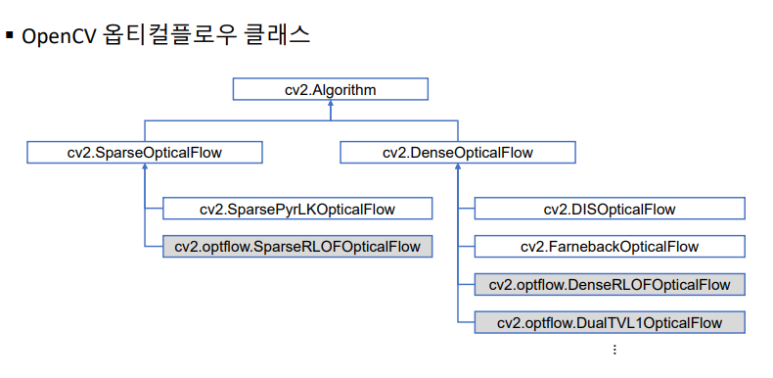

In [1]:
import sys 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import random 
!pip install opencv-python

In [2]:
def draw_flow(img, flow, step=16):

    h, w = img.shape[:2]

    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2, -1).astype(int)

    fx, fy = flow[y, x].T

    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)

    lines = np.int32(lines + 0.5)

    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    #입력영상의 그레이스케일을

    cv2.polylines(vis, lines, 0, (0, 255, 255), lineType=cv2.LINE_AA)

    #점을찍고

    for (x1, y1), (_x2, _y2) in lines:

        cv2.circle(vis, (x1, y1), 1, (0, 128, 255), -1, lineType=cv2.LINE_AA)

    #원을그림

    return vis

In [3]:
cap = cv2.VideoCapture('vtest.avi')



if not cap.isOpened():

    print('Camera open failed!')

    sys.exit()



ret, frame1 = cap.read()



if not ret:

    print('frame read failed!')

    sys.exit()



gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)



while True:

    ret, frame2 = cap.read()



    if not ret:

        print('frame read failed!')

        sys.exit()



    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 13, 3, 5, 1.1, 0)



    cv2.imshow('frame2', draw_flow(gray2, flow))

    if cv2.waitKey(20) == 27:

        break



    gray1 = gray2



cv2.destroyAllWindows()